In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

global_df = pd.read_csv("mental_health_anxiety.csv", sep = ";",  low_memory=False)

print(global_df.head())


   index       Entity Code  Year Schizophrenia (%) Bipolar disorder (%)  \
0      0  Afghanistan  AFG  1990           0.16056             0.697779   
1      1  Afghanistan  AFG  1991          0.160312             0.697961   
2      2  Afghanistan  AFG  1992          0.160135             0.698107   
3      3  Afghanistan  AFG  1993          0.160037             0.698257   
4      4  Afghanistan  AFG  1994          0.160022             0.698469   

  Eating disorders (%)  Anxiety disorders (%)  Drug use disorders (%)  \
0             0.101855               4.828830                1.677082   
1             0.099313               4.829740                1.684746   
2             0.096692               4.831108                1.694334   
3             0.094336               4.830864                1.705320   
4             0.092439               4.829423                1.716069   

   Depression (%)  Alcohol use disorders (%)  
0        4.071831                   0.672404  
1        4.07953

In [2]:
import pandas as pd
import plotly.express as px

forest = pd.read_csv("forest-cover-v1.csv", sep = ";")

display(forest.head())

Country Name Country Code           Capital      Continent  Area (kmå_)  \
0        Aruba          ABW        Oranjestad  North America          180   
1  Afghanistan          AFG             Kabul           Asia       652230   
2       Angola          AGO            Luanda         Africa      1246700   
3      Albania          ALB            Tirana         Europe        28748   
4      Andorra          AND  Andorra la Vella         Europe          468   

  Population Density (per kmå_) Population Growth Rate  \
0                      591,3611                 0,9991   
1                       63,0587                 1,0257   
2                       28,5466                 1,0315   
3                       98,8702                 0,9957   
4                      170,5641                   1,01   

  World Population Percentage  Population Rank Forest Area 1990  ...  \
0                           0              198      2,333333333  ...   
1                        0,52               36      1,850994088  ...   
2                        0,45               42      63,57807011  ...   
3                        0,04              138      28,78832117  ...   
4                           0              203      34,04255319  ...   

  Forest Area 2011 Forest Area 2012 Forest Area 2013 Forest Area 2014  \
0      2,333333333      2,333333333      2,333333333      2,333333333   
1      1,850994088      1,850994088      1,850994088      1,850994088   
2       57,4339761       56,9887511      56,54352611      56,09830111   
3      28,59465328      28,64660584      28,69855839      28,75051095   
4      34,04255319      34,04255319      34,04255319      34,04255319   

  Forest Area 2015 Forest Area 2016 Forest Area 2017 Forest Area 2018  \
0      2,333333333      2,333333333      2,333333333      2,333333333   
1      1,850994088      1,850994088      1,850994088      1,850994088   
2      55,65307612      55,20784471      54,76262934      54,31740595   
3       28,8024635      28,80218978      28,79206204       28,7919708   
4      34,04255319      34,04255319      34,04255319      34,04255319   

  Forest Area 2019 Forest Area 2020  
0      2,333333333      2,333333333  
1      1,850994088      1,850994088  
2      53,87217454      53,42695115  
3       28,7919708       28,7919708  
4      34,04255319      34,04255319  

[5 rows x 40 columns]

In [3]:
!pip install pycountry


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 59.1 MB/s eta 0:00:0000:0100:01


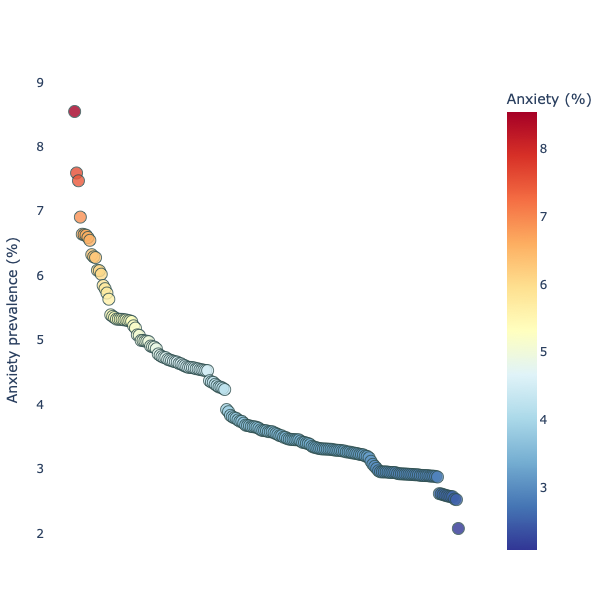

Saved vis1.html!


In [4]:
import pandas as pd
import plotly.express as px

# --- DATA PREP ---
df = pd.read_csv("mental_health_anxiety.csv", sep=";", low_memory=False)
df.columns = df.columns.str.strip()
df = df.rename(columns={"Entity": "Country"})

df["Anxiety disorders (%)"] = pd.to_numeric(df["Anxiety disorders (%)"], errors="coerce")
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# Find latest available year with valid data
for year in sorted(df["Year"].unique(), reverse=True):
    subset = df[df["Year"] == year][["Country", "Anxiety disorders (%)"]].dropna()
    if len(subset) > 0:
        df_latest = subset
        latest_year = int(year)
        break

# Remove aggregated regions
remove_words = ["World", "income", "region", "Asia", "Europe", "Africa", "America"]
df_latest = df_latest[~df_latest["Country"].str.contains("|".join(remove_words), case=False, na=False)]

# Sort for nicer plotting
df_latest = df_latest.sort_values("Anxiety disorders (%)", ascending=False)

# --- IMPROVED FIGURE ---
fig = px.scatter(
    df_latest,
    x=list(range(len(df_latest))),  # numeric x-axis → no labels
    y="Anxiety disorders (%)",
    color="Anxiety disorders (%)",
    color_continuous_scale="RdYlBu_r",
    hover_name="Country",           # show country only on hover
    height=600,
)

fig.update_traces(
    marker=dict(
        size=12,
        opacity=0.8,
        line=dict(width=1, color='DarkSlateGrey')
    )
)

fig.update_layout(
    xaxis=dict(
        showticklabels=False,   # hide country names
        title="",               # remove axis title
    ),
    yaxis_title="Anxiety prevalence (%)",
    plot_bgcolor="white",
    margin=dict(l=40, r=40, t=80, b=40),
    coloraxis_colorbar_title="Anxiety (%)",
)

fig.show()

fig.write_html("vis1.html", include_plotlyjs="cdn", full_html=False)
print("Saved vis1.html!")


In [6]:
forest = pd.read_csv("forest_area.csv", sep=";")
print(forest.columns.tolist())


['Rank', 'Country', 'Cultivated  land  (km2)', 'Cultivated  land  (%)', 'Arable  land  (km2)', 'Arable  land  (%)', 'Permanent  crops  (km2)', 'Permanent  crops  (%)', 'Other  lands  (km2)', 'Other  lands  (%)', 'Total  area  (km2)', 'Date']


In [7]:
import pandas as pd

df = pd.read_csv("mental_health_anxiety.csv", sep=";", low_memory=False)
df.columns = df.columns.str.strip()

df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Anxiety disorders (%)"] = pd.to_numeric(df["Anxiety disorders (%)"], errors="coerce")

df = df.dropna(subset=["Code"])

df_1995 = df[df["Year"] == 1995].copy()
df_2017 = df[df["Year"] == 2017].copy()

print("Maita 1995:", df_1995["Code"].nunique())
print("Maita 2017:", df_2017["Code"].nunique())

zmin = df["Anxiety disorders (%)"].min()
zmax = df["Anxiety disorders (%)"].max()


Maita 1995: 235
Maita 2017: 235


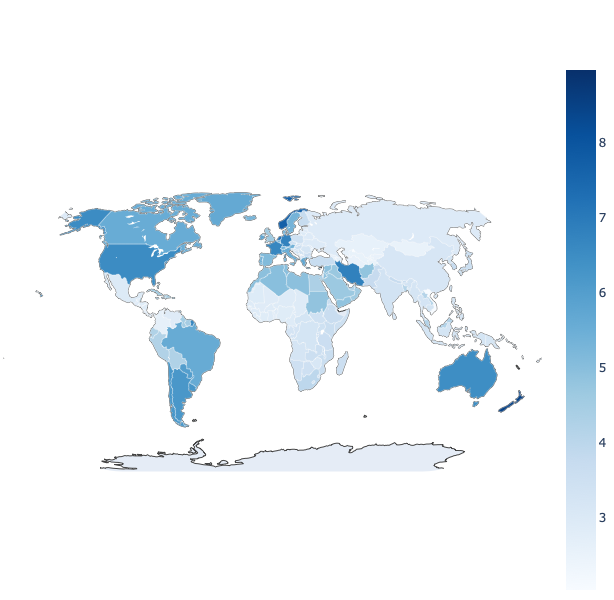

Saved vis2.html!


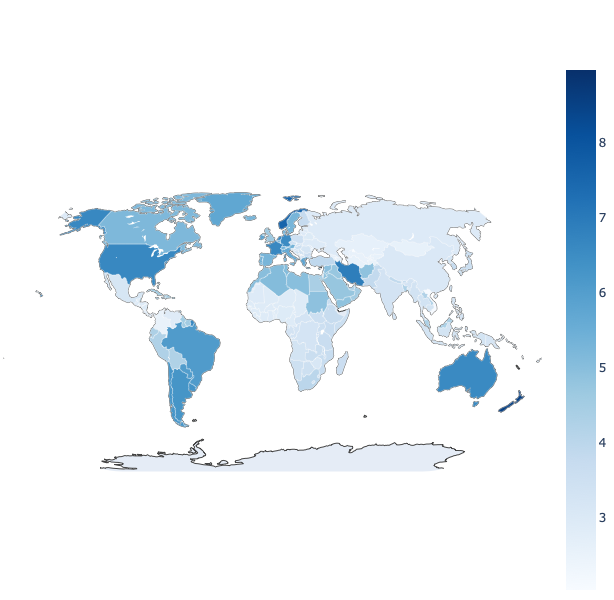

Saved vis3.html!


In [8]:
import plotly.graph_objects as go

fig_1995 = go.Figure(
    data=go.Choropleth(
        locations=df_1995["Code"],
        z=df_1995["Anxiety disorders (%)"],
        locationmode="ISO-3",
        colorscale="Blues",
        zmin=zmin,
        zmax=zmax,
        marker_line_color="white",
        marker_line_width=0.3,
        hovertemplate="%{location}<br>Anxiety: %{z:.2f}%<extra></extra>"
    )
)

fig_1995.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type="natural earth"),
    height=600,
    margin=dict(l=0, r=0, t=60, b=0)
)

fig_1995.show()
fig_1995.write_html("vis2.html", include_plotlyjs="cdn", full_html=False)
print("Saved vis2.html!")


fig_2017 = go.Figure(
    data=go.Choropleth(
        locations=df_2017["Code"],
        z=df_2017["Anxiety disorders (%)"],
        locationmode="ISO-3",
        colorscale="Blues",
        zmin=zmin,
        zmax=zmax,
        marker_line_color="white",
        marker_line_width=0.3,
        hovertemplate="%{location}<br>Anxiety: %{z:.2f}%<extra></extra>"
    )
)

fig_2017.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type="natural earth"),
    height=600,
    margin=dict(l=0, r=0, t=60, b=0)
)

fig_2017.show()

fig_2017.write_html("vis3.html", include_plotlyjs="cdn", full_html=False)
print("Saved vis3.html!")


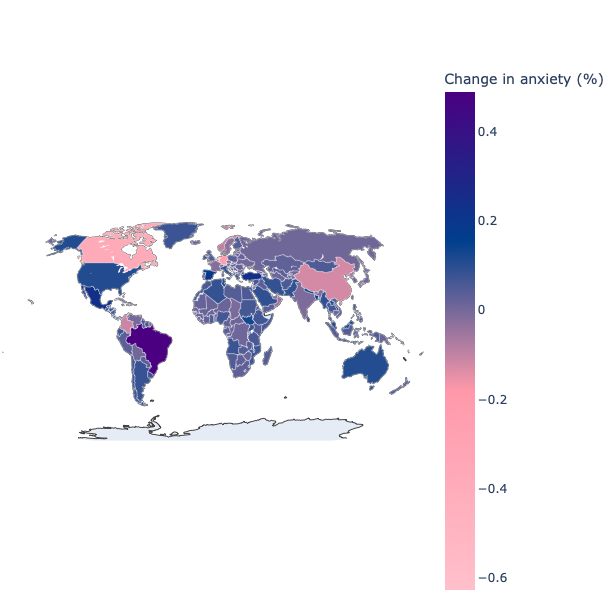

Saved vis4.html!


In [9]:
import pandas as pd
import plotly.graph_objects as go

merged_change = pd.merge(
    df_1995[["Code", "Anxiety disorders (%)"]],
    df_2017[["Code", "Anxiety disorders (%)"]],
    on="Code",
    suffixes=("_1995", "_2017")
)

merged_change["Change (%)"] = merged_change["Anxiety disorders (%)_2017"] - merged_change["Anxiety disorders (%)_1995"]


fig_change = go.Figure(
    data=go.Choropleth(
        locations=merged_change["Code"],
        z=merged_change["Change (%)"],
        locationmode="ISO-3",
        colorscale=[
            [0.0, "#ffc0cb"],   # very light blue
            [0.4, "#ff99aa"],   # blue
            [0.7, "#003f8c"],   # deep blue
            [1.0, "#4b0082"],   # strong violet
        ],
        zmin=merged_change["Change (%)"].min(),
        zmax=merged_change["Change (%)"].max(),
        colorbar_title="Change in anxiety (%)",
        marker_line_color="white",
        marker_line_width=0.3,
        hovertemplate="%{location}<br>Change: %{z:.2f} p.p.<extra></extra>"
    )
)

fig_change.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type="natural earth"),
    height=600,
    margin=dict(l=0, r=0, t=60, b=0)
)

fig_change.show()
fig_change.write_html("vis4.html", include_plotlyjs="cdn", full_html=False)
print("Saved vis4.html!")


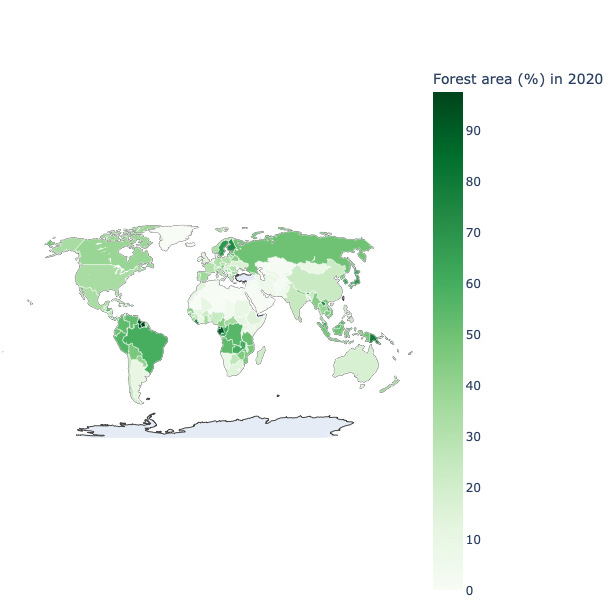

Saved vis5.html!


In [10]:
import pandas as pd
import plotly.graph_objects as go

forest = pd.read_csv("forest-cover-v1.csv", sep =";")
forest.columns = forest.columns.str.strip()


forest["Forest Area 2020"] = (
    forest["Forest Area 2020"]
    .astype(str)
    .str.replace(",", ".")
    .astype(float)
)

if "Country" in forest.columns:
    forest = forest[forest["Country"].str.lower() != "world"]
    country_col = "Country"
else:
   
    country_col = forest.columns[0] 



fig = go.Figure(
    data=go.Choropleth(
        locations=forest[country_col],
        z=forest["Forest Area 2020"],
        locationmode="country names",
        colorscale="Greens",
        colorbar_title="Forest area (%) in 2020",
        marker_line_color="white",
        marker_line_width=0.4,
        hovertemplate="%{location}<br>Forest area: %{z:.1f}%<extra></extra>"
    )
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="natural earth"
    ),
    height=600,
    margin=dict(l=0, r=0, t=60, b=0)
)

fig.show()
fig.write_html("vis5.html", include_plotlyjs="cdn", full_html=False)
print("Saved vis5.html!")


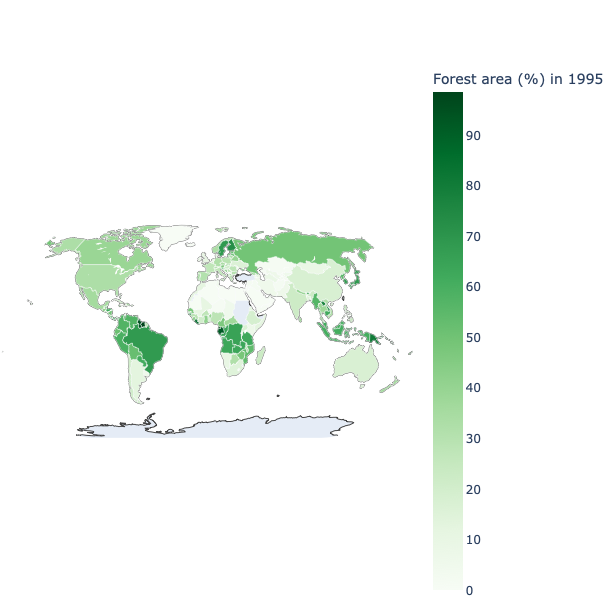

Saved vis6.html!


In [11]:
forest_col_1995 = [c for c in forest.columns if "1995" in c][0]

forest[forest_col_1995] = (
    forest[forest_col_1995]
    .astype(str)
    .str.replace(",", ".")
    .astype(float)
)

fig_1995 = go.Figure(
    data=go.Choropleth(
        locations=forest[country_col],
        z=forest[forest_col_1995],
        locationmode="country names",
        colorscale="Greens",
        colorbar_title="Forest area (%) in 1995",
        marker_line_color="white",
        marker_line_width=0.4,
        hovertemplate="%{location}<br>Forest area: %{z:.1f}%<extra></extra>"
    )
)

fig_1995.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type="natural earth"),
    height=600,
    margin=dict(l=0, r=0, t=60, b=0)
)

fig_1995.show()
fig_1995.write_html("vis6.html", include_plotlyjs="cdn", full_html=False)
print("Saved vis6.html!")


/opt/software/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



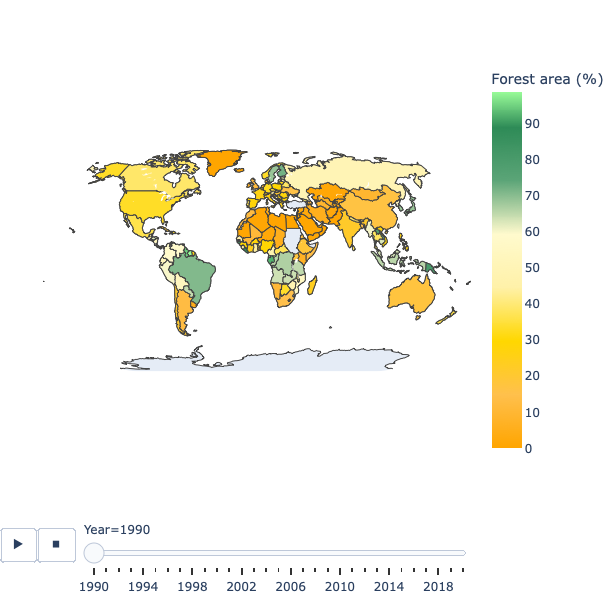

Saved forest_timeline.html!


In [12]:
import pandas as pd
import plotly.express as px

# Lataa data
forest = pd.read_csv("forest-cover-v1.csv", sep=";")
forest.columns = forest.columns.str.strip()

# Muutetaan pilkut pisteiksi ja numeromuotoon kaikissa vuosikolumneissa
year_cols = [col for col in forest.columns if col.startswith("Forest Area")]

for col in year_cols:
    forest[col] = (
        forest[col]
        .astype(str)
        .str.replace(",", ".")
        .astype(float)
    )

# Muuta data pitkään "long" muotoon Plotly-animaatiota varten
forest_long = forest.melt(
    id_vars=["Country Name"],
    value_vars=year_cols,
    var_name="Year",
    value_name="ForestArea"
)

# Poista rivit, joissa ei ole arvoa
forest_long = forest_long.dropna(subset=["ForestArea"])

# Siisti "Year"-sarake: poista sanat ja jätä pelkkä vuosiluku
forest_long["Year"] = forest_long["Year"].str.extract(r'(\d+)').astype(int)

# Luo animoitu kartta

colorscale = [
    [0.0,   "#FFA500"],  
    [0.15,  "#FFC04D"],
    [0.30,  "#FFD700"],  
    [0.45,  "#FFF1A8"],
    [0.60,  "#FFFACD"], 
    [0.75,  "#5CA578"],
    [0.90,  "#2E8B57"], 
    [1.0,   "#98FB98"]  
]

fig = px.choropleth(
    forest_long,
    locations="Country Name",
    locationmode="country names",
    color="ForestArea",
    animation_frame="Year",
    color_continuous_scale=colorscale,
    range_color=[forest_long.ForestArea.min(), forest_long.ForestArea.max()],
    labels={"ForestArea": "Forest area (%)"},
)


# Kartan asetukset
fig.update_geos(
    showframe=False,
    showcoastlines=True,
    projection_type="natural earth"
)

fig.update_layout(
    title_x=0.5,
    height=600,
    margin=dict(l=0, r=0, t=60, b=0)
)

fig.show()

# Tallenna HTML
fig.write_html("forest_timeline.html", include_plotlyjs="cdn", full_html=False)
print("Saved forest_timeline.html!")


In [14]:
import pandas as pd

# 1. Lataa datasets
mental = pd.read_csv("mental_health_anxiety.csv", sep=";", low_memory=False)
forest = pd.read_csv("forest-cover-v1.csv", sep=";")

# 2. Siivoa sarakkeet
mental.columns = mental.columns.str.strip()
forest.columns = forest.columns.str.strip()

mental = mental.rename(columns={"Entity": "Country", "Code": "Country Code"})
forest = forest.rename(columns={"Country Code": "Country Code"})

# 3. Numerot oikeaan muotoon
mental["Anxiety disorders (%)"] = pd.to_numeric(mental["Anxiety disorders (%)"], errors="coerce")
mental["Year"] = pd.to_numeric(mental["Year"], errors="coerce")

# 4. Poimi mental health -datasta viimeisin vuosi, jossa on ahdistuneisuusarvot
years = sorted(mental["Year"].dropna().unique(), reverse=True)

mental_latest = None
for y in years:
    subset = mental[mental["Year"] == y]
    if subset["Anxiety disorders (%)"].notna().any():
        mental_latest = subset[["Country", "Country Code", "Anxiety disorders (%)"]].dropna()
        break

print("Latest mental health year:", y)
print("Rows in mental_latest:", len(mental_latest))

# 5. Forest dataset: varmista että Country Code on oikein
forest["Country Code"] = forest["Country Code"].astype(str)

# 6. Koodien vertailu
mental_codes = set(mental_latest["Country Code"].dropna().unique())
forest_codes = set(forest["Country Code"].dropna().unique())

print("Mental count:", len(mental_codes))
print("Forest count:", len(forest_codes))

missing_in_forest = mental_codes - forest_codes
missing_in_mental = forest_codes - mental_codes

print("Codes in mental but NOT in forest:", missing_in_forest)
print("Codes in forest but NOT in mental:", list(missing_in_mental)[:20])


Latest mental health year: 2017.0
Rows in mental_latest: 196
Mental count: 196
Forest count: 214
Codes in mental but NOT in forest: {'MNP', 'TWN', 'OWID_WRL'}
Codes in forest but NOT in mental: ['IMN', 'GIB', 'MAC', 'HKG', 'NCL', 'FRO', 'PYF', 'VGB', 'SXM', 'CUW', 'TCA', 'KNA', 'MCO', 'MAF', 'SMR', 'ABW', 'TUV', 'PLW', 'NRU', 'LIE']


In [15]:
mental_codes = set(mental_latest["Country Code"].dropna().unique())
forest_codes = set(forest["Country Code"].dropna().unique())

print("Mental count:", len(mental_codes))
print("Forest count:", len(forest_codes))

missing_in_forest = mental_codes - forest_codes
missing_in_mental = forest_codes - mental_codes

print("Codes in mental but NOT in forest:", missing_in_forest)
print("Codes in forest but NOT in mental:", list(missing_in_mental)[:20])


Mental count: 196
Forest count: 214
Codes in mental but NOT in forest: {'MNP', 'TWN', 'OWID_WRL'}
Codes in forest but NOT in mental: ['IMN', 'GIB', 'MAC', 'HKG', 'NCL', 'FRO', 'PYF', 'VGB', 'SXM', 'CUW', 'TCA', 'KNA', 'MCO', 'MAF', 'SMR', 'ABW', 'TUV', 'PLW', 'NRU', 'LIE']


In [16]:
mental.columns = mental.columns.str.strip()
mental = mental.rename(columns={"Entity": "Country", "Code": "Country Code"})

# Convert to numeric
mental["Anxiety disorders (%)"] = pd.to_numeric(mental["Anxiety disorders (%)"], errors="coerce")
mental["Year"] = pd.to_numeric(mental["Year"], errors="coerce")
mental["Country Code"] = mental["Country Code"].astype(str).str.strip()
mental_latest = None

for year in sorted(mental["Year"].dropna().unique(), reverse=True):
    subset = mental[mental["Year"] == year][["Country", "Country Code", "Anxiety disorders (%)"]].dropna()
    if len(subset) > 0:
        mental_latest = subset
        latest_year = int(year)
        print("Latest Year Selected:", latest_year)
        break

print("Mental Latest Rows:", len(mental_latest))
print(mental_latest.head())
forest = pd.read_csv("forest-cover-v1.csv", sep=";")
forest.columns = forest.columns.str.strip()
forest["Country Code"] = forest["Country Code"].astype(str).str.strip()

# Ensure numerical forest area
forest["Forest Area 2020"] = (
    forest["Forest Area 2020"].astype(str).str.replace(",", ".").astype(float)
)

print("Forest Rows:", len(forest))
print(forest[["Country Name", "Country Code", "Forest Area 2020"]].head())
merged = pd.merge(
    mental_latest,
    forest,
    on="Country Code",
    how="inner"
)

print("Merged rows:", len(merged))
print(merged.head())


Latest Year Selected: 2017
Mental Latest Rows: 231
                  Country Country Code  Anxiety disorders (%)
27            Afghanistan          AFG               4.882481
55                Albania          ALB               3.385245
83                Algeria          DZA               5.065876
111        American Samoa          ASM               3.315834
139  Andean Latin America          nan               4.267738
Forest Rows: 214
  Country Name Country Code  Forest Area 2020
0        Aruba          ABW          2.333333
1  Afghanistan          AFG          1.850994
2       Angola          AGO         53.426951
3      Albania          ALB         28.791971
4      Andorra          AND         34.042553
Merged rows: 193
          Country Country Code  Anxiety disorders (%)    Country Name  \
0     Afghanistan          AFG               4.882481     Afghanistan   
1         Albania          ALB               3.385245         Albania   
2         Algeria          DZA               5.0

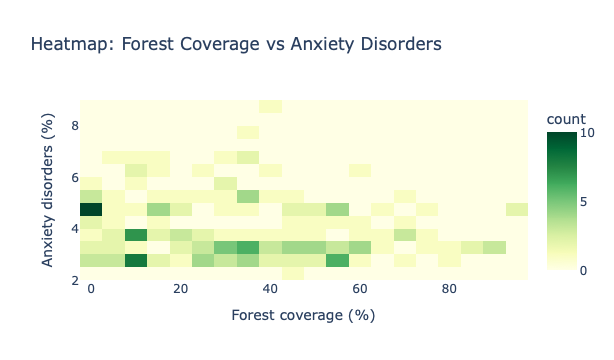

Saved korrelation.html!


In [17]:
import plotly.express as px

fig = px.density_heatmap(
    merged,
    x="Forest Area 2020",
    y="Anxiety disorders (%)",
    nbinsx=20,
    nbinsy=20,
    color_continuous_scale="ylgn",
    title="Heatmap: Forest Coverage vs Anxiety Disorders",
)

fig.update_layout(
    xaxis_title="Forest coverage (%)",
    yaxis_title="Anxiety disorders (%)",
)
fig.show()
fig.write_html("korrelation.html", include_plotlyjs="cdn", full_html=False)
print("Saved korrelation.html!")

